In [63]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [64]:
# Import new customer data (combine data)

df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis'

combine_data = pd.read_pickle(os.path.join(df_path, '02 Data', 'Original Data','combined_data.pkl'))[:1500]

combine_data.rename(columns = {'order_dow' : 'order_day_of_week'}, inplace = True)

combine_data.head(n=20)


,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,prior,1,2,9,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,prior,4,1,17,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,6,1,8,21.0
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,3004753,test,9,2,16,22.0
9,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,2135662,prior,1,6,17,NaN


Text(0.5, 1.0, 'Income by User ID')

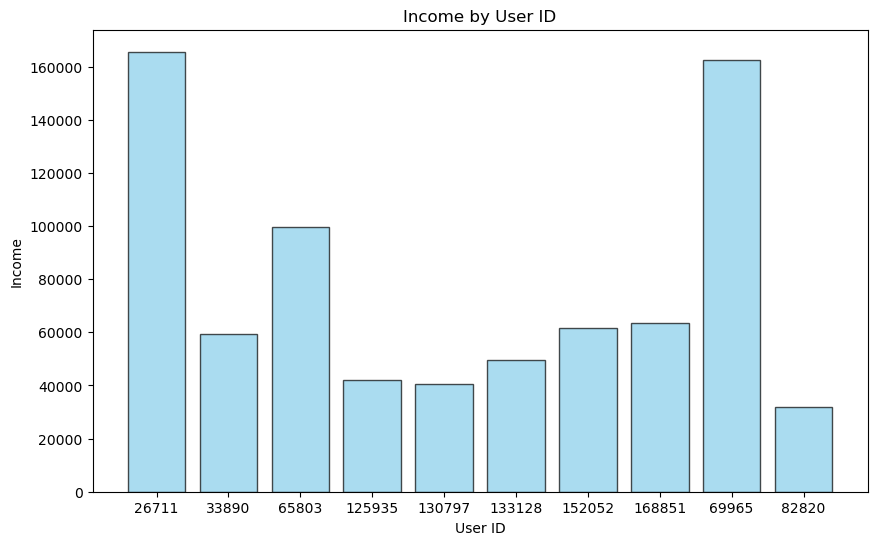

In [65]:
user_income = combine_data[['user_id','income']].drop_duplicates()[:10]
user_income['user_id'] = user_income['user_id'].astype(str)
plt.figure(figsize=(10,6))
plt.bar(user_income['user_id'], user_income['income'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('User ID')
plt.ylabel('Income')
plt.title('Income by User ID')

<Axes: ylabel='Frequency'>

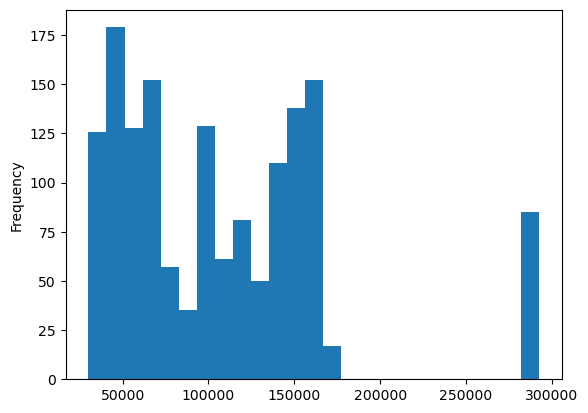

In [66]:
combine_data['income'].plot.hist(bins = 25)

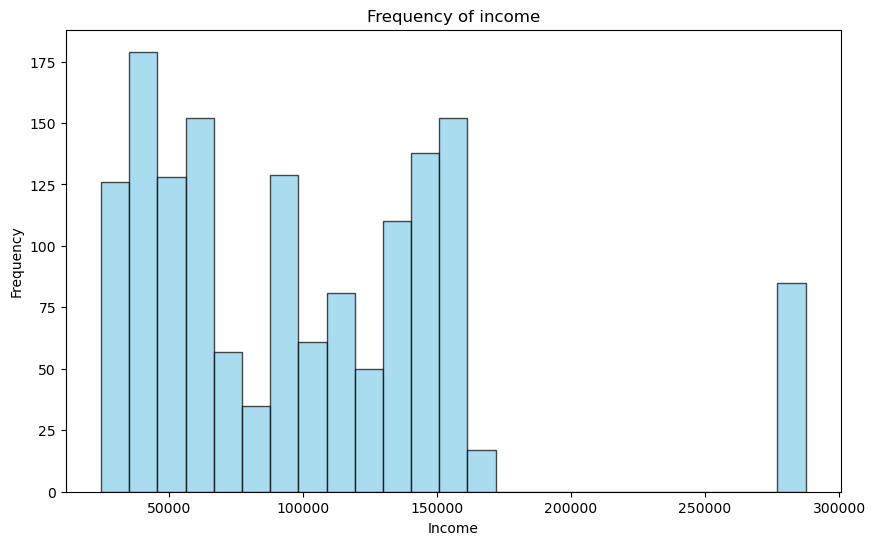

In [198]:

df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/income_frequency_bar.png'
#frequency_income = combine_data[['user_id','income']].drop_duplicates()[:10]
#frequency_income['income'] = frequency_income['frequency'].astype(str)
frequencies, bin_edges = np.histogram(combine_data['income'],bins=25)
plt.figure(figsize=(10,6))
plt.bar(bin_edges[:-1], frequencies,width=np.diff(bin_edges),color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Frequency of income')
plt.savefig(df_path)

<Axes: xlabel='Age', ylabel='income'>

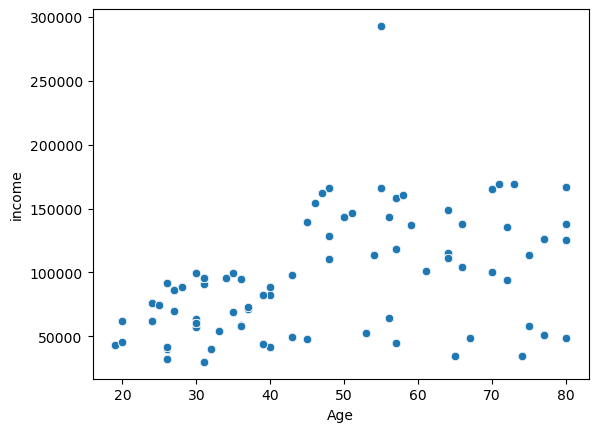

In [67]:
sns.scatterplot(x = 'Age', y = 'income',data = combine_data)

In [105]:
df_2 = combine_data[['order_hour_of_day','income']].drop_duplicates()

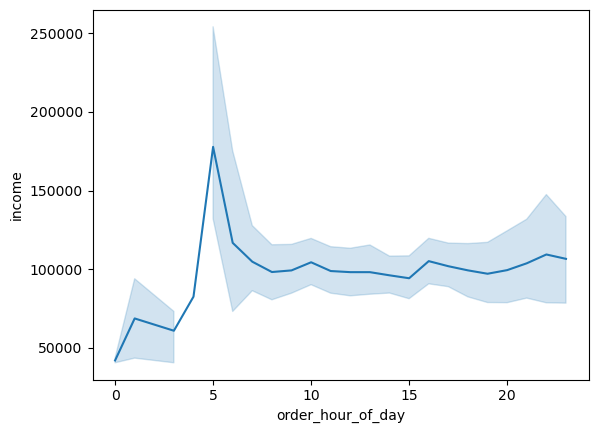

In [107]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'income')

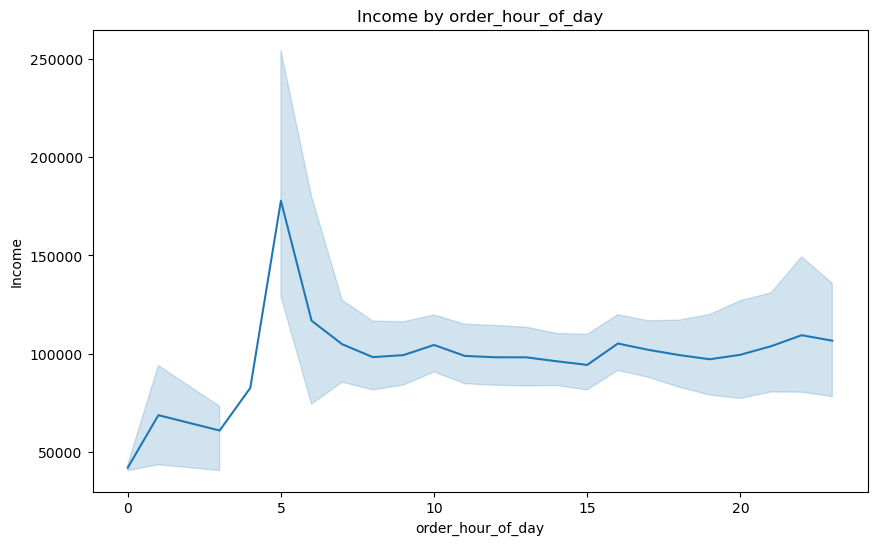

In [126]:
df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/line chart - income_by_hour.png'

age_income = combine_data[['order_hour_of_day','income']].drop_duplicates()
plt.figure(figsize=(10,6))
sns.lineplot(data = age_income, x = 'order_hour_of_day',y = 'income')
plt.xlabel('order_hour_of_day')
plt.ylabel('Income')
plt.title('Income by order_hour_of_day') 

plt.savefig(df_path)

<Axes: ylabel='Frequency'>

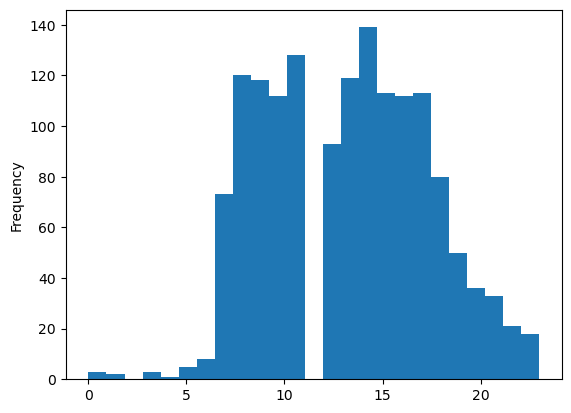

In [70]:
combine_data['order_hour_of_day'].plot.hist(bins = 25)

The histogram shows a bimodal distribution with distinct peaks, the first peak occurs around 9am to 10am(hours 9 to 10),where the frequency of orders spikes to around 2.5million.The second ,slighly higher peak occurs around 2pm to 4pm(hours 14 to 16),with frequencies also nearing 2.5million

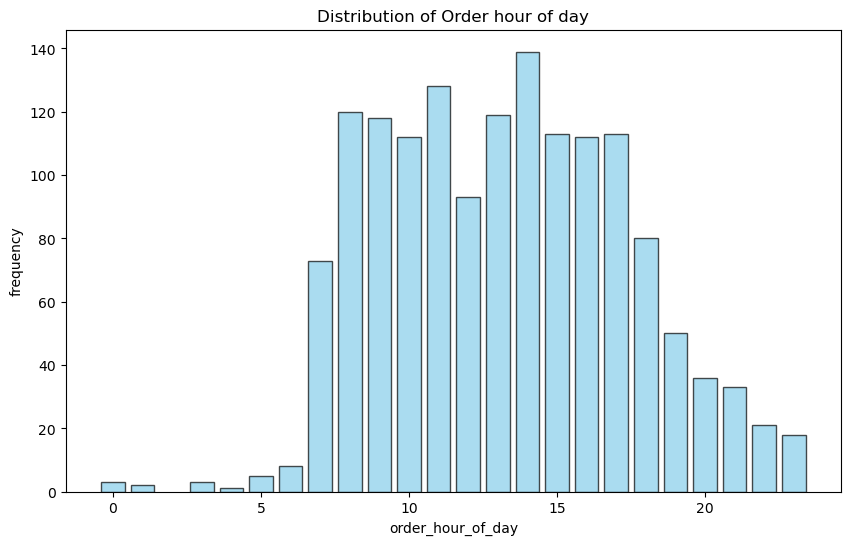

In [200]:
df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/bar_order_frequency histogram.png'

order_frequency = combine_data['order_hour_of_day'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(order_frequency.index,order_frequency.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Order hour of day')
plt.xlabel('order_hour_of_day')
plt.ylabel('frequency')
plt.savefig(df_path)


In [72]:
order_counts = combine_data.groupby('user_id').size().reset_index(name='order_count')

print("Number of orders per customer:")
print(order_counts)

Number of orders per customer:
    user_id  order_count
0        51            4
1       516           94
2      5763           11
3      6965           10
4      8794            7
..      ...          ...
75   180190           17
76   180333            5
77   195665          100
78   197419           20
79   201111            4

[80 rows x 2 columns]


<Axes: xlabel='loyalty_flag'>

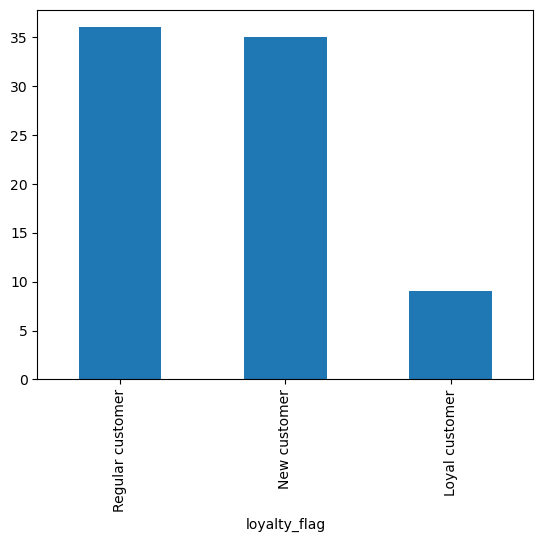

In [73]:
# Simulate the loyalty_flag column

order_counts.loc[order_counts['order_count'] > 40, 'loyalty_flag'] = 'Loyal customer'
order_counts.loc[(order_counts['order_count'] <= 40) & (order_counts['order_count'] > 10), 'loyalty_flag'] = 'Regular customer'
order_counts.loc[order_counts['order_count'] <= 10, 'loyalty_flag'] = 'New customer'

# create a bar chart

order_counts['loyalty_flag'].value_counts().plot.bar()

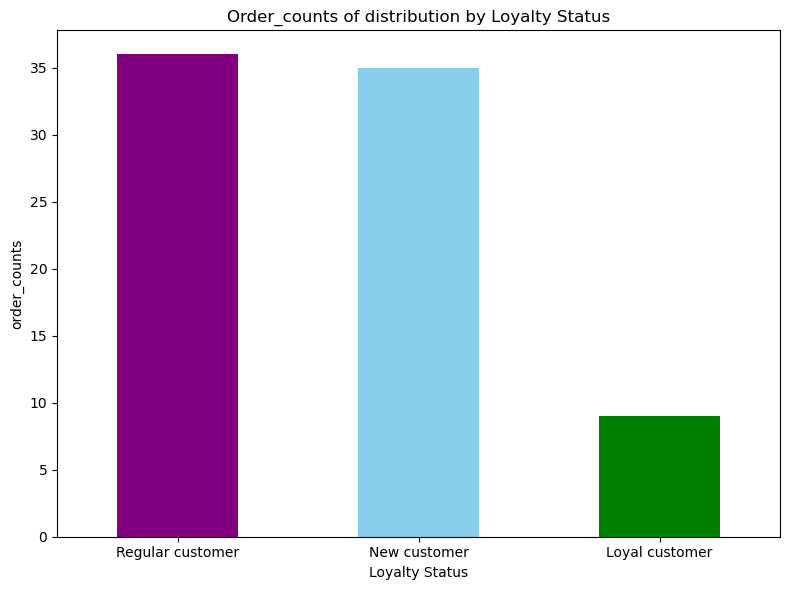

In [170]:
df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Bar chart - order_counts_by_loyalty_flag.png'

#order_counts = combine_data['loyalty_flag'].value_counts()
# plt.figure(figsize=(18,6))

# plt.figure(figsize=(10,6))
# plt.bar(order_counts['loyalty_flag'],order_counts['order_count'], color='skyblue', alpha=0.7)
# plt.xlabel('loyalty_flag')
# plt.ylabel('order_Count')
# plt.title('Order Counts by loyalty flag') 

# Count the number of customers in each loyalty category
loyalty_counts = order_counts['loyalty_flag'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
loyalty_counts.plot(kind='bar', color=['purple', 'skyblue', 'green'])
plt.title('Order_counts of distribution by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('order_counts')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
# plt.show()

plt.savefig(df_path)

In [109]:
df_4 = combine_data[['Age','n_dependants']].drop_duplicates()

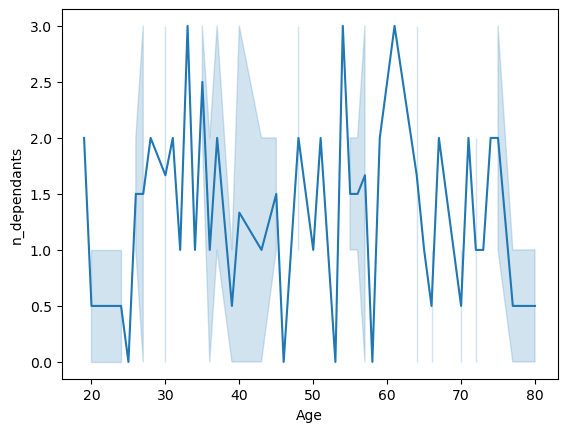

In [111]:
line = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

The line chart shows the average age for each value of n_dependents ,starting at n_depedents = 0,the average age is around 49.45years as
the n_dependants increases to around 1.0,the average age rises slightly to just above 49.55years.

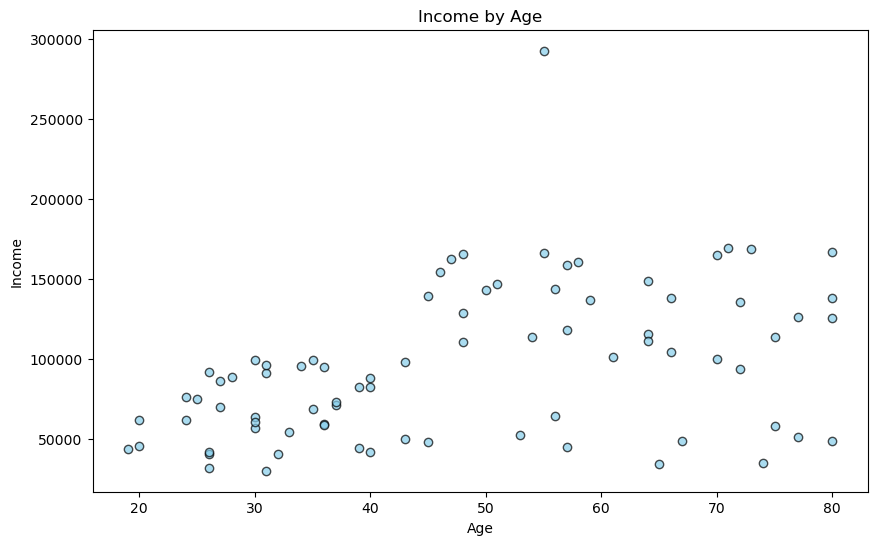

In [77]:
df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/scatterplot - income by Age.png'

age_income = combine_data[['Age','income']].drop_duplicates()
plt.figure(figsize=(10,6))
plt.scatter(age_income['Age'], age_income['income'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income by Age') 

plt.savefig(df_path)

The scatterplot shows the distribution of individual ages (20 to 80) against their income (0 to 600,000).Most individuals have incomes below 100,000 and are aged 40_60,with no strong correlation between income and age 

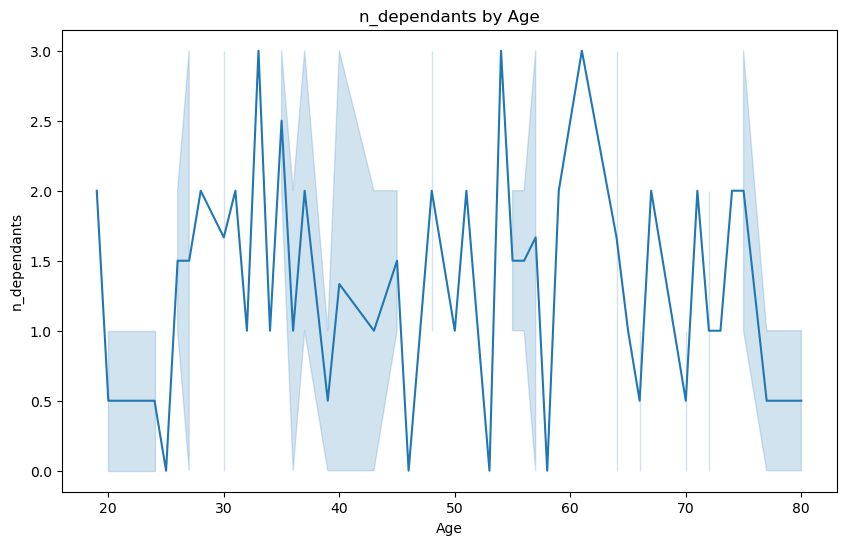

In [188]:

df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Line chart - n_dependants by Age.png'

age_income = combine_data[['Age','n_dependants']].drop_duplicates()
plt.figure(figsize=(10,6))
sns.lineplot(data=age_income, x='Age', y='n_dependants')
plt.title('n_dependants by Age') 

plt.savefig(df_path)

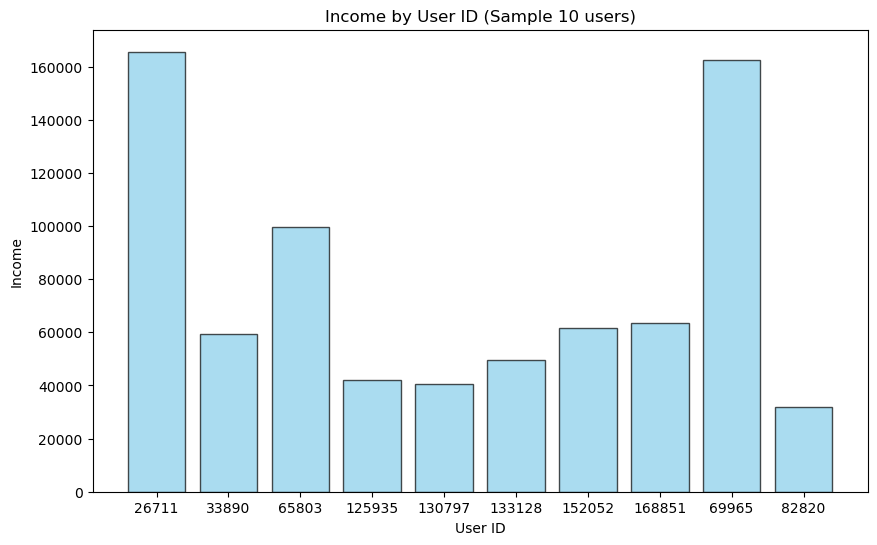

In [80]:
#Export visualizations as "png" file in Analysis.

df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations/bar chart - income by user id.png'

user_income = combine_data[['user_id','income']].drop_duplicates()[:10]
user_income['user_id'] = user_income['user_id'].astype(str)
plt.figure(figsize=(10,6))
plt.bar(user_income['user_id'], user_income['income'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('User ID')
plt.ylabel('Income')
plt.title('Income by User ID (Sample 10 users)') 

plt.savefig(df_path)
